<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/01_AritmeticaPuntoFlotante/04_IEEE754.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Estándar precisión simple (I.E.E.E. 754)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

## Introducción

La **precisión p** de un sistema numérico de punto flotante en una computadora estará limitada por la **longitud de palabra N** disponible para representar un número.

Con el fin de evitar la proliferación de diversos sistemas de puntos flotantes incompatibles entre sí, a fines de la década de 1980, la I.E.E.E. (Instituto de ingenieros eléctrico-electricistas) desarrolló la norma o estándar **IEEE754**, la cual es implementada en todas las computadoras personales actuales y aplicada en casi todos los otros sistemas computacionales. 

Esta norma define tres formatos de punto flotante con $\beta=2$:



## Estándares

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Simple.</i></h3>
  </font>
  
* $\mathcal{F}(2,24,-125,128)$ implementado en una longitud de palabra $N=32\,bits$.


* $8\,bits$ para el exponente y una precisión o mantisa de $24\,bits$.


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Doble.</i></h3>
  </font>
  
* $\mathcal{F}(2,53,-1021,1024)$ implementado en una longitud de palabra $N=64\,bits$.


* $11\,bits$ para el exponente y una precisión o mantisa de $53\,bits$.
  
<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Extendida.</i></h3>
  </font>
  
* $15\,bits$ para el exponente.


* Precisión de $64\,bits$.

##   Precisión Simple


* Por números de precisión simple de punto flotante entenderemos todos los números aceptables en una computadora que usan el formato aritmético de punto flotante de precisión simple.


* Este conjunto es un subconjunto finito de los números reales, consta de:

    * $\pm0$.

    * $\pm\infty$.
    
    * números de punto flotante de precisión simple normal y subnormal.

    * NaN (not a number), por ejemplo una división por cero.   


Por otro lado recuerda que que la mayoría de los números reales, no se pueden representar exactamente como números de punto flotante, ya que tienen una expansión decimal o binaria infinita, por ejemplo algunos de los racionales y todos los irracionales $(\pi,\,e,\,\frac{1}{3},\,0.1)$.

### Anatomía de precisión simple

<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Precisión Simple.</i></h3>
  </font>
  
Debido a la longitud de palabra de 32 bits tanto como sea posible el número de máquina normalizado

$$\pm q\times2^{m}$$

Debe caber en 32 bits, una forma de asignar este espacio es:

* $\color{blue}{signo}$ de $q$: bit mas significativo.

* $\color{blue}{exponente}$ $m$: del bit 30 al bit 23 (8 bits).

* $\color{blue}{mantisa}$ $q$: del bit 22 al bit menos significativo (23 bits) 


<font color="Teal" face="Comic Sans MS,arial">
  <h3 align="Left"><i>Exponente con desplazamiento (sesgado).</i></h3>
  </font>
  
$m$ puede representar $2^{8}$ posibles valores, mediante el corrimiento, en estos 8 bits podremos representar valores en el rango de $[-127,128]$.

### En forma de conjunto

El estándar de precisión simple en forma de conjunto se ve así.

$$\mathcal{F}(2,24,-125,128)$$

es decir:

![underflow](https://docs.google.com/uc?export=download&id=13XGhOgxnttBa3RvS9rIvY_HiL8NjBAIx)

* $x_{min}=\beta^{L-1}2^{-125-1}=2^{-126}\approx10^{-38}$.


* $x_{max}=\beta^{U}(1-\beta^{-p})=2^{128}(1-2^{-24})\approx10^{38}$.


* $\epsilon_{M}=2^{-23}=10^{-7}$(7 dígitos decimales significativos).


* Unidad de redondeo $u=\frac{1}{2}\epsilon_{M}=2^{-24}\approx6\times10^{-8}$.


* ¿Cuántos decimales significativos se tendrán en precisión doble y extendida?.

## Peculiaridades

Considerando que la cantidad de bits es fija y la notación normalizada, tendremos algunas peculiaridades tanto para el estandar de precisión simple como para cualquier otro.

### Corrimiento y Bit implícito

Con 8 bits se tienen $2^{8}=256$ posibles valores (combinaciones) para el exponente, es decir se pueden generar valores en el rango $[0, 255]$.

Un exponente cero es aquel en el que todos los bits del exponente tienen valor cero. Y el exponente 255 es en el que todos los bits son 1.


Y para poder tener exponentes negativos, es necesario restar un corrimiento (desplazamiento) al valor del exponente es decir $E=e-127$. Donde E es el valor real del exponente que se quiere representar. 

Para $\beta=2$ en notación normalizada, el primer bit siempre sera 1, por lo que resulta redundante almacenar este valor, y esto permite tener una mantisa efectiva de 24 bits.




### ¡Valores especiales!

Anteriormente se dejo en claro que debido a la normalización de los valores, no es posible representar el valor cero, es por esto que hay que considerar la manera de representarlo.

Por otra parte en la aritmética de punto flotante pueden presentarse las 3 condiciones siguientes:

* Operación, cuyo resultado este fuera del rango representable en el sistema.


* Operación matemática indefinida (división por cero).


* Operación matemática ilegal, por ejemplo; $5-\frac{0}{0}\,,\,\sqrt[2]{-1}.$


* Antes de la introducción de la norma IEE754 cuando se daba uno de estos casos, el calculo (algoritmo) se detenía.

### Aritmética cerrada en $\mathcal{F}$

La norma IEEE754 define una aritmética cerrada en $\mathcal{F}$, introduciendo ciertos valores especiales.


De manera tal que la norma IEEE745 implementa una aritmética de no detención.

* $\color{blue}{Cero}$: Mantisa nula y exponente nulo es decir $\underset{31-bits}{\underbrace{00...0000}}$, notar que existe $-0\,y\,+0$.


* $\color{blue}{Infinitos}$: Se dan cuando un cálculo produce un desbordamiento, o por la división de un numero no nulo por cero. Se representan mediante   

$$\underset{\overbrace{8-bits}}{\overset{\underbrace{exp}}{1....1}} \hspace{1mm} \underset{\overbrace{23-bits}}{\overset{\underbrace{mantisa}}{0.....0}}$$

* $\color{blue}{NaN}$: Son operaciones ilegales como $\sqrt[2]{-1}$, se representa mediante 

$$\underset{\overbrace{8-bits}}{\overset{\underbrace{exp}}{1....1}} \hspace{1mm} \underset{\overbrace{23-bits}}{\overset{\underbrace{mantisa}}{1..01..1}}$$

### Valores Denormalizados (subnormales)

Ya hemos visto el por que las expresiones numéricas en un sistema de punto flotante deben estar en notación normalizada, sin embargo con el fin de lograr representar valores más cercanos al cero, es necesario hacer uso de valores denormalizados.


#### Números denormalizados

La distancia entre 0 y $x_{min}$ es mucho mayor que la distancia entre $x_{min}$ y el valor que le sigue, por lo que la asignación a 0 de una condición de **underflow** produce errores de redondeo excepcionalmente grandes.


Para cubrir esta distancia se crearon los números denormalizados. Estos se obtienen de eliminar la condición de que $d_{1}\neq0$.

Se aplica unicamente para los números que corresponden al mínimo exponente y mantisa diferente de cero, es decir 


$$\underset{\overbrace{8-bits}}{\overset{\underbrace{exp}}{0....0}} \hspace{1mm} \underset{\overbrace{23-bits}}{\overset{\underbrace{mantisa}}{1.01.1}}$$


#### Rango de valores denormalizados

De esta manera la unicidad de la representación se mantiene y ahora es posible representar números de punto flotante en intervalo.

$$(-\beta^{L-1},\beta^{L-1})$$


Siendo el numero denormalizado de magnitud mas pequeña.

$$\beta^{L-p}$$

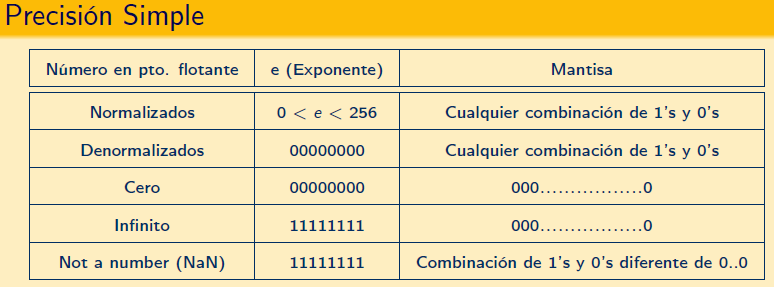

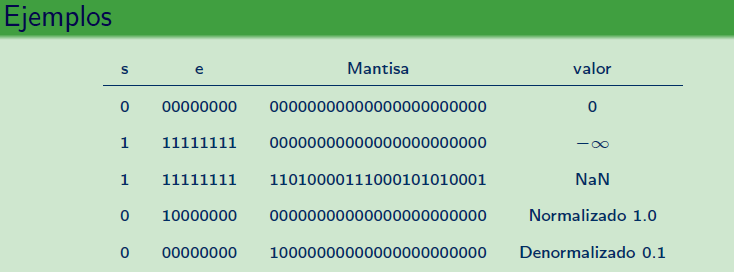

## Ejercicios

Determina la representación de máquina en precisión simple del valor decimal -52.234375.

* Primer paso: Convertir la parte entera a binario. $(52)_{10}=(64)_{8}=(110\,100)_{2}$

<font color="RED" face="Comic Sans MS,arial">
  <h3 align="Left"><i>TIP</i></h3>
  </font>
  
**Si conviertes el decimal primero a base octal te ahorras algunas divisiones**.

* Ahora se convierte la parte fraccionaria $(.234375)_{10}=(.17)_{8}=(001\,111)_{2}$


* Se tiene que $(52.234375)_{10}=(110\,100.001\,111)_{2}=(1.101000011110)_{2}\times2^{5}$ es la forma normalizada del valor a convertir en base binaria y $(.101000011110)_{2}$ es la mantisa.


* Después, sabemos que el exponente es $(5)_{10}$ y puesto que $e-127=5$ podemos ver que $e=5+127=(132)_{10}=(204)_{8}=(10\,000\,100)_{2}$ es el exponente almacenado.


* Por lo que la representación de máquina en precisión simple de -52.234375 es:

$$\underset{signo}{\underbrace{1}}\underset{exponente}{\underbrace{10000100}}\underset{mantisa}{\underbrace{10100001111000000000000}}_{2}=0\times C250F000_{16}$$

Determina el número decimal correspondiente a este número de máquina $0\times45DE4000_{16}$


* En binario $(0100\,0101\,1101\,1110\,0100\,0000\,0000\,0000)_{2}$


* El exponente corresponde a $(10\,001\,011)_{2}=(213)_{8}=(139)_{10}$, así que $139-127=12.$


* La mantisa es positiva y representa al número:

$$(1.101\,111\,001)_{2}\times2^{12}=(1\,101\,111\,001\,000.)_{2}\\=(15710.)_{8}\\=1\times8^{4}+5\times8^{3}+7\times8^{2}+1\times8\\=8(1+8(7+8(5+8(1))))\\=7112$$

## Referencias

1. Riswan Butt: Numerical Analysys Using Matlab, Jones and Bartlett.

2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.